In [145]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [147]:
%%R

# My commonly used R imports
require('tidyverse')

In [148]:
%%R

library(jpeg)
library(png)
library(grid)
library(hrbrthemes)


In [149]:
df_five = pd.read_csv('shootings_five_years.csv')
df_five.tail(20)

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
2681,1037515,2018-01-28,Indiana,Indianapolis,1313 N Sherman Dr,2,3,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2682,1038429,2018-01-28,Pennsylvania,Reading,123 S 3rd St,4,0,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2683,1037438,2018-01-27,Kentucky,Bowling Green,645 Pearl Street,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2684,1037541,2018-01-27,California,Los Angeles,243 East 119th St,0,5,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2685,1035803,2018-01-25,District of Columbia,Washington,1600 block of Kenilworth Ave NE,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2686,1033262,2018-01-23,Kentucky,Benton,416 High School Rd,2,14,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2687,1034205,2018-01-23,Pennsylvania,Philadelphia,N 24th St and Ridge Ave,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2688,1032393,2018-01-21,Florida,Orlando,3101 Willow Bend Blvd,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2689,1031851,2018-01-21,Illinois,Chicago,3200 W Division St,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2690,1029095,2018-01-17,District of Columbia,Washington,2000 block of 16th St SE,1,3,https://www.gunviolencearchive.org/incident/10...,2018,01-2018


In [150]:
df_five.dtypes

incident_id        int64
incident_date     object
state             object
city_or_county    object
address           object
killed             int64
injured            int64
incident_url      object
year               int64
month-year        object
dtype: object

In [151]:
df_five['month-year'] = pd.to_datetime(df_five['month-year'], format='%m-%Y').dt.strftime('%m-%Y')
df_five.head()


,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022


In [152]:
df_five['new_col'] = pd.to_datetime(df_five['month-year'], format='%m-%Y')
df_five['month-year'] = df_five['new_col'].dt.to_period('M')
df_five.drop(['new_col'], axis=1, inplace=True)
df_five.dtypes


incident_id           int64
incident_date        object
state                object
city_or_county       object
address              object
killed                int64
injured               int64
incident_url         object
year                  int64
month-year        period[M]
dtype: object

In [153]:
df_five.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,2022-12


In [154]:
killed_by_year = df_five.groupby('year')['killed'].sum()
killed_by_year

year
2018    372
2019    465
2020    513
2021    706
2022    676
Name: killed, dtype: int64

In [155]:
# put the data into a dataframe

df_killed = pd.DataFrame(killed_by_year)
df_killed = df_killed.reset_index()
df_killed

,year,killed
0,2018,372
1,2019,465
2,2020,513
3,2021,706
4,2022,676


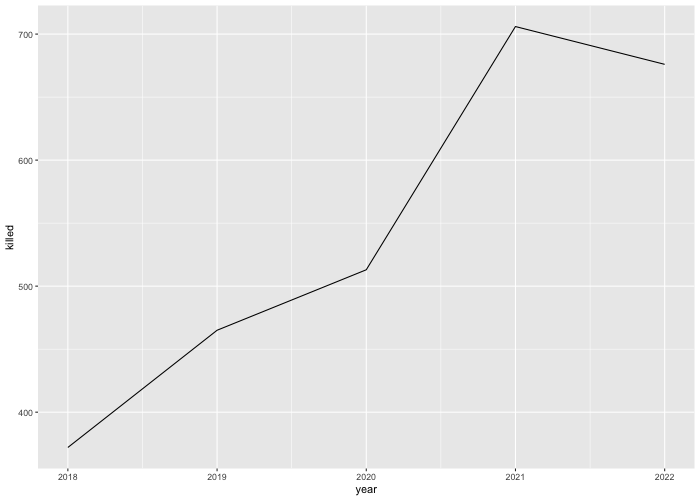

In [156]:
%%R -i df_killed  -h 500 -w 700

ggplot(df_killed) +
    aes(x = year, y = killed) +
    geom_line() 
 


In [157]:
df_decade = pd.read_csv('shootings_eight_years.csv')
df_decade.tail(20)

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
4741,104218,2014-02-05,Illinois,Chicago,6740 N Clark St,1,3,https://www.gunviolencearchive.org/incident/10...,2014,02-2014
4742,103698,2014-02-03,Indiana,Franklin,2100 block of Bridlewood Dr,3,2,https://www.gunviolencearchive.org/incident/10...,2014,02-2014
4743,140117,2014-01-30,Texas,Cypress,14015 Fosters Creek Dr,4,0,https://www.gunviolencearchive.org/incident/14...,2014,01-2014
4744,101301,2014-01-27,North Carolina,Rocky Mount,821 Word Plaza,0,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4745,113665,2014-01-27,Washington,Seattle,2nd Avenue South and South Main Street,1,4,https://www.gunviolencearchive.org/incident/11...,2014,01-2014
4746,100434,2014-01-25,Illinois,Chicago,S Union Ave and W 51st St,1,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4747,100568,2014-01-25,Florida,Belle Glade,600 block of Covenant Drive,0,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4748,98836,2014-01-21,New Jersey,Newark,Springfield Avenue,2,3,https://www.gunviolencearchive.org/incident/98836,2014,01-2014
4749,104902,2014-01-20,Virginia,Manassas,8509 Rixlew Ln,0,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4750,97407,2014-01-16,Oklahoma,Ardmore,H St NE and Martin Luther King Blvd,2,4,https://www.gunviolencearchive.org/incident/97407,2014,01-2014


In [313]:
# remove duplicates by incident_id

df_decade = df_decade.drop_duplicates(subset='incident_id', keep='first')
df_decade

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year,victims_count
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,5
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4
...,...,...,...,...,...,...,...,...,...,...,...
4756,95550,2014-01-12,Alabama,Huntsville,University Drive,0,5,https://www.gunviolencearchive.org/incident/95550,2014,01-2014,5
4757,95146,2014-01-11,Mississippi,Jackson,3430 W. Capitol Street,0,4,https://www.gunviolencearchive.org/incident/95146,2014,01-2014,4
4758,94514,2014-01-05,Pennsylvania,Erie,829 Parade St,1,3,https://www.gunviolencearchive.org/incident/94514,2014,01-2014,4
4759,92704,2014-01-03,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3,https://www.gunviolencearchive.org/incident/92704,2014,01-2014,4


In [158]:
# create a new column called 'victims_count' which is the sum of killed and injured

df_decade['victims_count'] = df_decade['killed'] + df_decade['injured']
df_decade.head() 

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year,victims_count
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,5
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4


In [159]:
killed = df_decade.groupby('year')['killed'].sum()
killed

year
2014    275
2015    738
2016    906
2017    443
2018    372
2019    465
2020    513
2021    706
2022    676
Name: killed, dtype: int64

In [314]:
# see only data from 2016 and arrange killed column in descending order

df_decade[df_decade['year'] == 2016].sort_values(by='killed', ascending=False).head(10)

# orlando s=nightclub shooting


,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year,victims_count
3296,577157,2016-06-12,Florida,Orlando,1912 S Orange Ave,50,53,https://www.gunviolencearchive.org/incident/57...,2016,06-2016,103
3354,545525,2016-04-22,Ohio,Piketon,4077 Union Hill Rd,8,0,https://www.gunviolencearchive.org/incident/54...,2016,04-2016,8
3423,494378,2016-01-27,Virginia,Chesapeake,1401 N. George Washington Hwy,6,0,https://www.gunviolencearchive.org/incident/49...,2016,01-2016,6
3405,508640,2016-02-20,Michigan,Kalamazoo,5581 Cracker Barrel Blvd,6,2,https://www.gunviolencearchive.org/incident/50...,2016,02-2016,8
3386,519541,2016-03-09,Pennsylvania,Pittsburgh (Wilkinsburg),1304 Franklin Ave,6,2,https://www.gunviolencearchive.org/incident/51...,2016,03-2016,8
3355,546022,2016-04-22,Georgia,Appling,3162 Johnson Drive,6,0,https://www.gunviolencearchive.org/incident/54...,2016,04-2016,6
3062,727759,2016-12-17,Illinois,Chicago (Roseland),100 block of W 105th St,5,0,https://www.gunviolencearchive.org/incident/72...,2016,12-2016,5
3389,518436,2016-03-07,Kansas,Kansas City,3000 block of South 36th Street,5,0,https://www.gunviolencearchive.org/incident/51...,2016,03-2016,5
3398,512073,2016-02-26,Washington,Belfair,300 block of Horseshoe Rd,5,0,https://www.gunviolencearchive.org/incident/51...,2016,02-2016,5
3236,604762,2016-07-17,Louisiana,Baton Rouge,9611 Airline Hwy,5,2,https://www.gunviolencearchive.org/incident/60...,2016,07-2016,7


In [330]:
df_decade[df_decade['year'] == 2021].sort_values(by='injured', ascending=False).head(10)

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year,victims_count
1103,2019622,2021-05-30,Florida,Hialeah,7630 NW 186th St,3,20,https://www.gunviolencearchive.org/incident/20...,2021,05-2021,23
782,2137198,2021-10-10,Minnesota,Saint Paul,214 7th St W,1,15,https://www.gunviolencearchive.org/incident/21...,2021,10-2021,16
1117,2012765,2021-05-22,South Carolina,North Charleston,Piggly Wiggly Dr and W Jimtown Dr,1,14,https://www.gunviolencearchive.org/incident/20...,2021,05-2021,15
1071,2032220,2021-06-12,Texas,Austin,400 block of E 6th St,1,14,https://www.gunviolencearchive.org/incident/20...,2021,06-2021,15
822,2123395,2021-09-23,Tennessee,Collierville,240 New Byhalia Rd,2,14,https://www.gunviolencearchive.org/incident/21...,2021,09-2021,16
674,2187990,2021-12-12,Texas,Baytown,1403 N Market Loop,1,13,https://www.gunviolencearchive.org/incident/21...,2021,12-2021,14
1249,1952281,2021-03-14,Illinois,Chicago,6798 block of S South Chicago Ave,2,13,https://www.gunviolencearchive.org/incident/19...,2021,03-2021,15
998,2053262,2021-07-05,Ohio,Toledo,Lawrence Ave and Wall St,1,11,https://www.gunviolencearchive.org/incident/20...,2021,07-2021,12
740,2155329,2021-10-31,Illinois,Joliet,1018 E Jackson St,3,11,https://www.gunviolencearchive.org/incident/21...,2021,10-2021,14
1122,2012633,2021-05-22,New Jersey,Bridgeton,1029 E Commerce St,3,11,https://www.gunviolencearchive.org/incident/20...,2021,05-2021,14


In [160]:
# put killed in a dataframe

df_killed = pd.DataFrame(killed)
df_killed = df_killed.reset_index()
df_killed

,year,killed
0,2014,275
1,2015,738
2,2016,906
3,2017,443
4,2018,372
5,2019,465
6,2020,513
7,2021,706
8,2022,676


In [161]:
injured = df_decade.groupby('year')['injured'].sum()
injured

year
2014    1086
2015    2674
2016    3078
2017    1809
2018    1330
2019    1712
2020    2540
2021    2827
2022    2702
Name: injured, dtype: int64

In [162]:
df_injured = pd.DataFrame(injured)
df_injured = df_injured.reset_index()
df_injured

,year,injured
0,2014,1086
1,2015,2674
2,2016,3078
3,2017,1809
4,2018,1330
5,2019,1712
6,2020,2540
7,2021,2827
8,2022,2702


In [163]:

incidents = df_decade.groupby('year')['incident_id'].count()
incidents

year
2014    273
2015    672
2016    766
2017    349
2018    336
2019    417
2020    610
2021    690
2022    648
Name: incident_id, dtype: int64

In [164]:
df_incidents = pd.DataFrame(incidents)
df_incidents = df_incidents.reset_index()
df_incidents.rename(columns={'incident_id': 'incident_count'}, inplace=True)
df_incidents

,year,incident_count
0,2014,273
1,2015,672
2,2016,766
3,2017,349
4,2018,336
5,2019,417
6,2020,610
7,2021,690
8,2022,648


In [165]:
df_vic_count = df_decade.groupby('year')['victims_count'].sum()
df_vic_count

year
2014    1361
2015    3412
2016    3984
2017    2252
2018    1702
2019    2177
2020    3053
2021    3533
2022    3378
Name: victims_count, dtype: int64

In [166]:
df_vic_count = pd.DataFrame(df_vic_count)
df_vic_count = df_vic_count.reset_index()
df_vic_count


,year,victims_count
0,2014,1361
1,2015,3412
2,2016,3984
3,2017,2252
4,2018,1702
5,2019,2177
6,2020,3053
7,2021,3533
8,2022,3378


In [167]:
# combine dataframe

df_victims = pd.merge(df_killed, df_injured, on='year')
df_victims = pd.merge(df_victims, df_incidents, on='year')
df_victims = pd.merge(df_victims, df_vic_count, on='year')
df_victims

,year,killed,injured,incident_count,victims_count
0,2014,275,1086,273,1361
1,2015,738,2674,672,3412
2,2016,906,3078,766,3984
3,2017,443,1809,349,2252
4,2018,372,1330,336,1702
5,2019,465,1712,417,2177
6,2020,513,2540,610,3053
7,2021,706,2827,690,3533
8,2022,676,2702,648,3378


In [168]:
df_victims.dtypes

year              int64
killed            int64
injured           int64
incident_count    int64
victims_count     int64
dtype: object

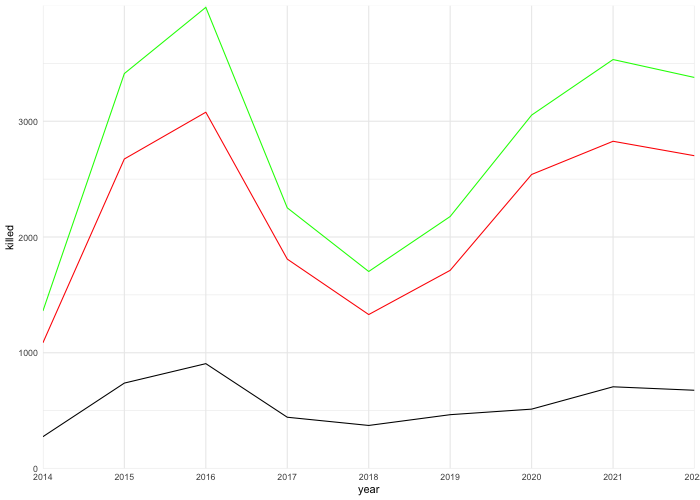

In [169]:
%%R -i df_victims -h 500 -w 700

ggplot(df_victims) +
    aes(x = year, y = killed) +
    geom_line() +
    geom_line(aes(y = injured), color = 'red') +
    geom_line(aes(y = victims_count), color = 'green') +
    scale_x_continuous(breaks = seq(2014, 2022, by = 1)) +
    scale_y_continuous(breaks = seq(0, 3000, by = 1000), limits = c(0, 4000)) +
    coord_cartesian(xlim = c(2014,2022), expand = FALSE) +
    theme_minimal() +
    theme(
    panel.grid.minor.x = element_blank()
  )
 

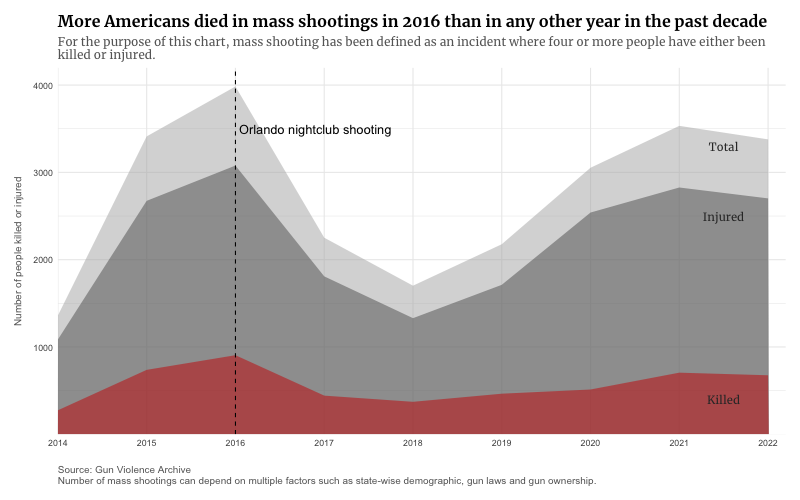

In [340]:
%%R -i df_victims -h 500 -w 800

# make geom_area for victims_count, killed and injured

ggplot(df_victims) +
    aes(x = year, y = victims_count) +
    geom_area(fill = 'gray69', alpha=0.5, position = "stack") +
    geom_area(aes(y = injured), fill = 'gray36', alpha=0.5, position = "stack") +
    geom_area(aes(y = killed), fill = 'red3', alpha=0.5, position = "stack") +
    geom_vline(xintercept = 2016, color = 'black', linetype = 'dashed', size = 0.5) +
    scale_x_continuous(breaks = seq(2014, 2022, by = 1)) +
    scale_y_continuous(breaks = seq(1000, 4000, by = 1000), limits = c(0, 4200)) + # how do I get rid of the y-axis extending beyond side of graph?
    coord_cartesian(xlim = c(2014,2022.2), expand = FALSE) +
    theme_minimal() +
    theme(
    panel.grid.minor.x = element_blank(),
    plot.title = element_text(face = "bold", size = 16, family = "Merriweather", color = "black", margin = margin(b = 11)),
    plot.subtitle = element_text(size = 12, family = "Merriweather", color = "gray40"),
    plot.caption = element_text(hjust = 0, size = 10, family = "Arial", color = "gray40"),
    axis.title.y = element_text(size = 10, family = "Arial", color = "gray40", margin = margin(r = 10)),
    plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")
  ) +
    # annotate("curve",
    #     x = 2016.3, y = 1500,
    #     xend = 2016, yend = 1000,
    #     arrow = arrow(length = unit(0.5, "cm")),
    #     curvature = 0.2, size = 0.8, color = "gray20") +
    annotate("text",
        x = 2016.9, y = 3500,
        label = "Orlando nightclub shooting", size = 4.5, family = "Arial", color = "black") +
    annotate("text",
        x = 2021.5, y = 400,
        label = "Killed", size = 4, family = "Merriweather", color = "gray20",) +
    annotate("text",
        x = 2021.5, y = 2500,
        label = "Injured", size = 4, family = "Merriweather", color = "gray20") +
    annotate("text",
        x = 2021.5, y = 3300,
        label = "Total", size = 4, family = "Merriweather", color = "gray20") +
    labs(title = "More Americans died in mass shootings in 2016 than in any other year in the past decade",
       subtitle = "For the purpose of this chart, mass shooting has been defined as an incident where four or more people have either been\nkilled or injured.",
       x = "",
       y = "Number of people killed or injured",
       caption = "Source: Gun Violence Archive\nNumber of mass shootings can depend on multiple factors such as state-wise demographic, gun laws and gun ownership.")

In [171]:
df_decade.head() 

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year,victims_count
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,9
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,5
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022,4


In [172]:
# number of incidents by state by descending order

df_state = df_decade.groupby('state')['incident_id'].count()
df_state = pd.DataFrame(df_state)
df_state.rename(columns={'incident_id': 'incident_count'}, inplace=True)
df_state.sort_values(by='incident_count', ascending=False, inplace=True)
df_state = df_state.reset_index()
df_state

# normalize the data with population - mass shootings per 100,000 people
# read - https://www.bmj.com/content/364/bmj.l542 

# ref - https://www.abc.net.au/news/2015-12-13/only-five-us-states-spared-from-mass-shootings-this-year/7024390
# reasons for more vs less mass shootings in a state - population? gun laws? gun ownership? 
# can compare top three with lowest three - how have the laws changed in these states? data on gun ownership? normalize by population?
# check laws in 2014 vs 2022 - https://www.gunlawscorecard.org/


,state,incident_count
0,Illinois,484
1,California,443
2,Texas,323
3,Florida,294
4,New York,226
5,Pennsylvania,215
6,Louisiana,210
7,Georgia,195
8,Ohio,179
9,Michigan,152


In [177]:
# number of incidents by state by year

df_state = df_decade.groupby(['year', 'state'])['incident_id'].count()
df_state = pd.DataFrame(df_state)
df_state = df_state.reset_index()
df_state.rename(columns={'incident_id': 'incident_count'}, inplace=True)
df_state


# has the gap between the number of shootings in states that have strict gun laws vs states that have more relaxed laws
# widened or narrowed over the years?

,year,state,incident_count
0,2014,Alabama,2
1,2014,Alaska,1
2,2014,Arizona,1
3,2014,Arkansas,2
4,2014,California,41
...,...,...,...
356,2022,Tennessee,17
357,2022,Texas,50
358,2022,Virginia,20
359,2022,Washington,11


In [194]:
df_state_pivot = df_state.pivot_table(index='state', columns='year', values='incident_count', aggfunc='sum').reset_index()
df_state_pivot = df_state_pivot.dropna(subset=[2014, 2022])
df_state_pivot.reset_index(drop=True)





year,state,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,2.0,8.0,30.0,7.0,14.0,12.0,11.0,23.0,16.0
1,Arizona,1.0,12.0,8.0,5.0,2.0,6.0,4.0,6.0,13.0
2,Arkansas,2.0,4.0,6.0,3.0,6.0,5.0,13.0,5.0,5.0
3,California,41.0,54.0,92.0,38.0,35.0,49.0,39.0,45.0,50.0
4,Colorado,2.0,6.0,8.0,2.0,8.0,4.0,11.0,13.0,13.0
5,Connecticut,1.0,4.0,12.0,2.0,2.0,3.0,7.0,2.0,3.0
6,District of Columbia,6.0,6.0,10.0,5.0,6.0,7.0,8.0,16.0,9.0
7,Florida,17.0,52.0,60.0,24.0,30.0,15.0,34.0,31.0,31.0
8,Georgia,17.0,40.0,34.0,9.0,8.0,19.0,17.0,22.0,29.0
9,Illinois,26.0,50.0,84.0,37.0,35.0,41.0,68.0,86.0,57.0


In [195]:
df_state_pivot.dtypes

year
state     object
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
2019     float64
2020     float64
2021     float64
2022     float64
dtype: object

In [199]:
# convert to int

df_state_pivot[2014] = df_state_pivot[2014].astype(int)
df_state_pivot[2022] = df_state_pivot[2022].astype(int)

In [211]:
# create a new dataframe with just the state, 2014 and 2022

df_change = df_state_pivot[['state', 2014, 2022]]
df_change

year,state,2014,2022
0,Alabama,2,16
2,Arizona,1,13
3,Arkansas,2,5
4,California,41,50
5,Colorado,2,13
6,Connecticut,1,3
8,District of Columbia,6,9
9,Florida,17,31
10,Georgia,17,29
12,Illinois,26,57


In [212]:
# create a new column called 'change' which is the difference between 2022 and 2014

df_change['change'] = df_change[2022] - df_change[2014]
df_change

year,state,2014,2022,change
0,Alabama,2,16,14
2,Arizona,1,13,12
3,Arkansas,2,5,3
4,California,41,50,9
5,Colorado,2,13,11
6,Connecticut,1,3,2
8,District of Columbia,6,9,3
9,Florida,17,31,14
10,Georgia,17,29,12
12,Illinois,26,57,31


In [218]:
# create another column for percentage change and round to 2 decimal places

df_change['perc_change'] = round((df_change['change'] / df_change[2014]) * 100, 2)
df_change

year,state,2014,2022,change,perc_change
0,Maryland,1,19,18,1800.00
1,Arizona,1,13,12,1200.00
2,Minnesota,1,12,11,1100.00
3,Alabama,2,16,14,700.00
4,Wisconsin,2,16,14,700.00
5,North Carolina,3,21,18,600.00
6,Colorado,2,13,11,550.00
7,New Mexico,1,4,3,300.00
8,Oklahoma,2,8,6,300.00
9,Washington,3,11,8,266.67


In [217]:
# arrange in descending order

df_change.sort_values(by='perc_change', ascending=False, inplace=True)
df_change.reset_index(drop=True, inplace=True)
df_change

year,state,2014,2022,change,perc_change
0,Maryland,1,19,18,1800.000000
1,Arizona,1,13,12,1200.000000
2,Minnesota,1,12,11,1100.000000
3,Alabama,2,16,14,700.000000
4,Wisconsin,2,16,14,700.000000
5,North Carolina,3,21,18,600.000000
6,Colorado,2,13,11,550.000000
7,New Mexico,1,4,3,300.000000
8,Oklahoma,2,8,6,300.000000
9,Washington,3,11,8,266.666667


In [213]:
# save the dataframe as a csv file

df_change.to_csv('df_change.csv', index=False)


In [214]:
df_change

year,state,2014,2022,change
0,Alabama,2,16,14
2,Arizona,1,13,12
3,Arkansas,2,5,3
4,California,41,50,9
5,Colorado,2,13,11
6,Connecticut,1,3,2
8,District of Columbia,6,9,3
9,Florida,17,31,14
10,Georgia,17,29,12
12,Illinois,26,57,31


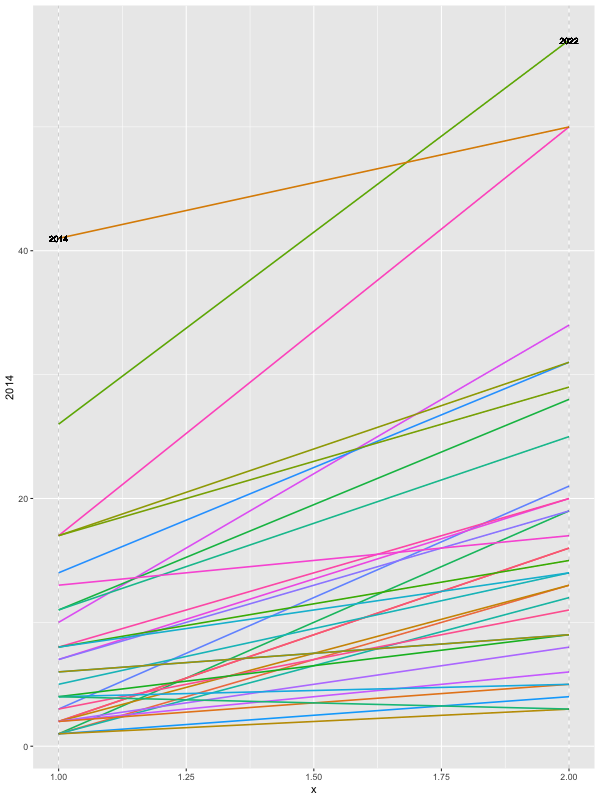

In [208]:
%%R -i df_change -h 800 -w 600

ggplot(df_change) +
geom_segment(aes(x=1, xend=2, y=`2014`, yend=`2022`, col=state), size=.75, show.legend=F) +
geom_vline(xintercept=1, linetype="dashed", size=.1) + 
geom_vline(xintercept=2, linetype="dashed", size=.1) +






